Single Exponential Smoothing

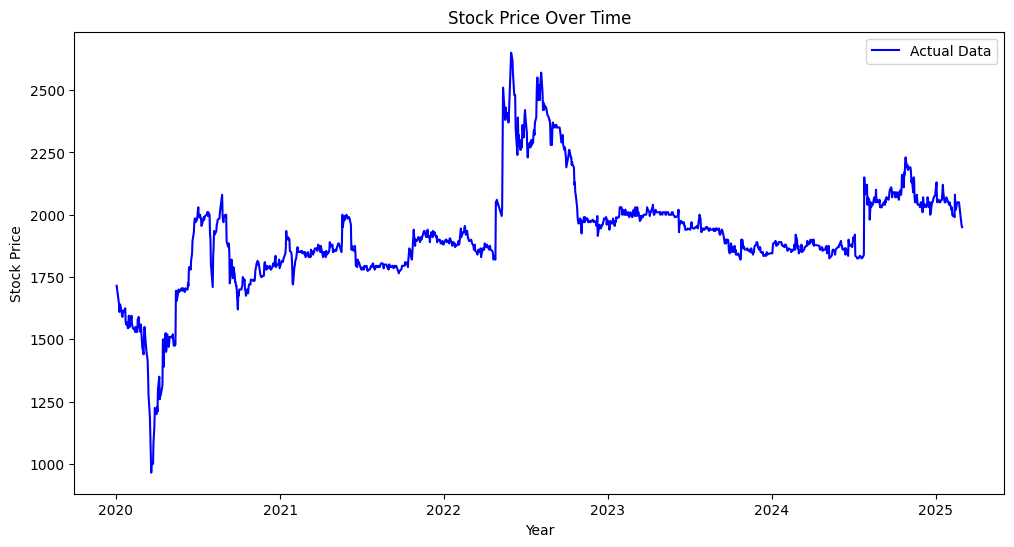

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

df = pd.read_csv("Harga_Saham_CEKA1.csv", parse_dates=["Date"], index_col="Date")

df = df[["Close"]]

plt.figure(figsize=(12,6))
plt.plot(df, label="Actual Data", color='blue')
plt.title("Stock Price Over Time")
plt.xlabel("Year")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


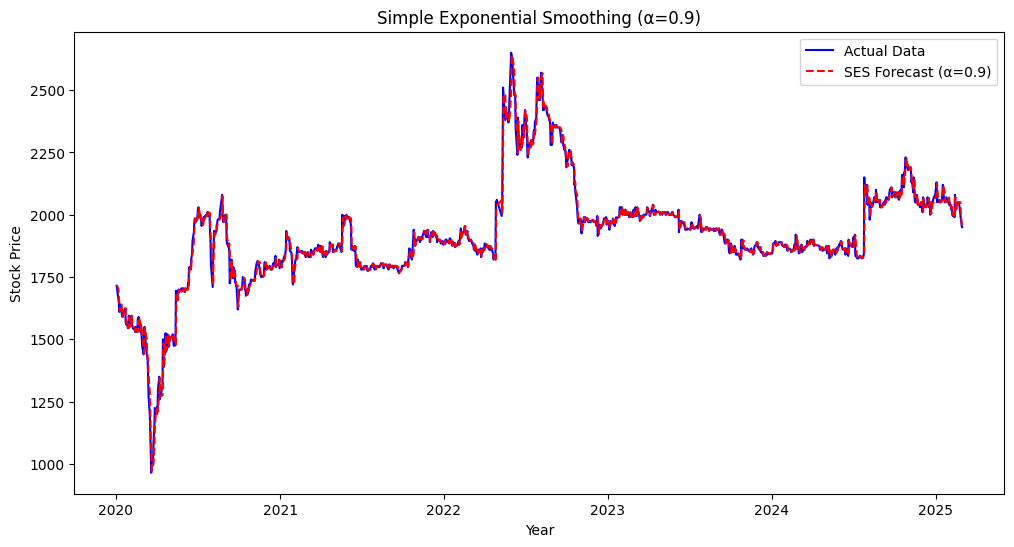

In [13]:
# Inisialisasi model SES dengan alpha = 0.9
model = SimpleExpSmoothing(df["Close"]).fit(smoothing_level=0.9, optimized=False)

# Prediksi harga saham
df["SES"] = model.fittedvalues

# Plot hasilnya
plt.figure(figsize=(12,6))
plt.plot(df["Close"], label="Actual Data", color="blue")
plt.plot(df["SES"], label="SES Forecast (α=0.9)", color="red", linestyle="dashed")
plt.title("Simple Exponential Smoothing (α=0.9)")
plt.xlabel("Year")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


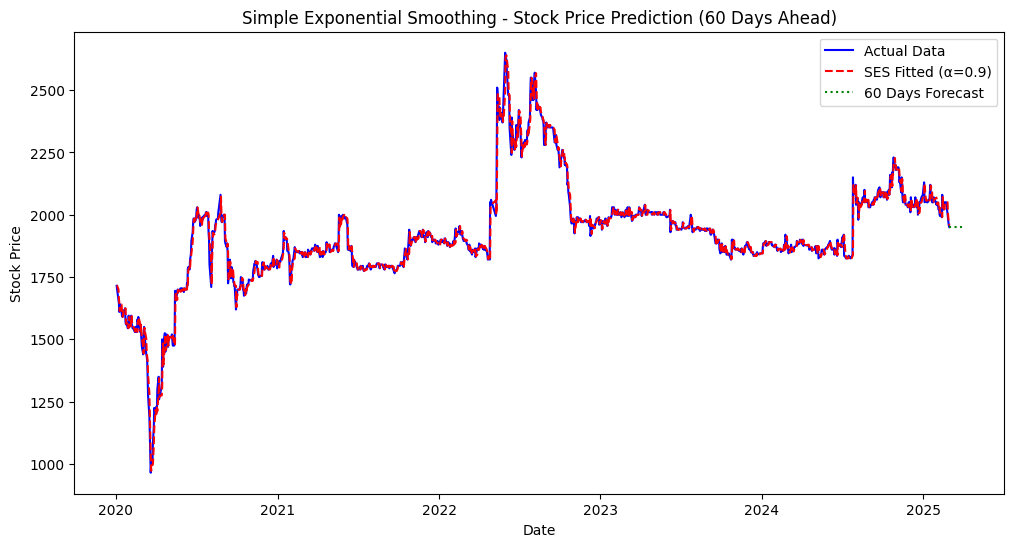

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

df = pd.read_csv("Harga_Saham_CEKA1.csv", parse_dates=["Date"], index_col="Date")

model = SimpleExpSmoothing(df["Close"]).fit(smoothing_level=0.9, optimized=False)

df["SES"] = model.fittedvalues

forecast = model.forecast(30)

plt.figure(figsize=(12,6))
plt.plot(df.index, df["Close"], label="Actual Data", color="blue")
plt.plot(df.index, df["SES"], label="SES Fitted (α=0.9)", color="red", linestyle="dashed")
plt.plot(pd.date_range(df.index[-1], periods=30, freq="D"), forecast, label="60 Days Forecast", color="green", linestyle="dotted")
plt.title("Simple Exponential Smoothing - Stock Price Prediction (60 Days Ahead)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


MAPE: 0.94%


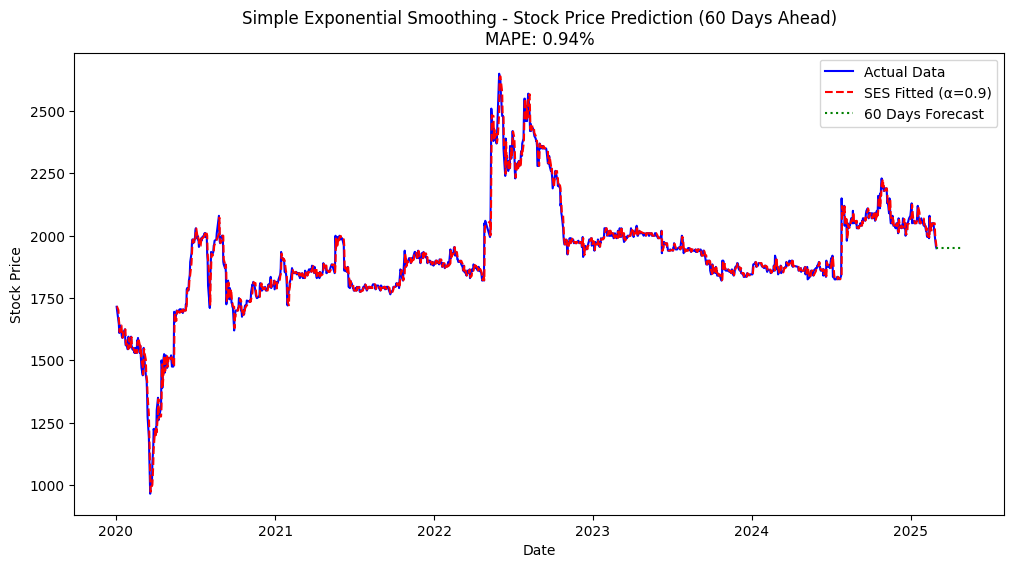

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import numpy as np

df = pd.read_csv("Harga_Saham_CEKA1.csv", parse_dates=["Date"], index_col="Date")

model = SimpleExpSmoothing(df["Close"]).fit(smoothing_level=0.9, optimized=False)

df["SES"] = model.fittedvalues

forecast = model.forecast(60)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(df["Close"].iloc[1:], df["SES"].iloc[1:])

print(f"MAPE: {mape:.2f}%")

plt.figure(figsize=(12,6))
plt.plot(df.index, df["Close"], label="Actual Data", color="blue")
plt.plot(df.index, df["SES"], label="SES Fitted (α=0.9)", color="red", linestyle="dashed")
plt.plot(pd.date_range(df.index[-1], periods=60, freq="D"), forecast, label="60 Days Forecast", color="green", linestyle="dotted")
plt.title(f"Simple Exponential Smoothing - Stock Price Prediction (60 Days Ahead)\nMAPE: {mape:.2f}%")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.show()
